In [3]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
# Load .env environment variables
load_dotenv()

True

## Collect Crypto Prices Using the requests Library

In [6]:
my_btc = 1.2
my_eth = 5.3

In [7]:
btc_url = 'https://api.alternative.me/v2/ticker/bitcoin/?convert=USD'
eth_url = 'https://api.alternative.me/v2/ticker/ethereum/?convert=USD'

In [8]:
btc_data = requests.get(btc_url)
eth_data = requests.get(eth_url)

In [9]:
#outputs bitcoin data in json
btc_json = btc_data.json()
btc_json

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 18821262,
   'total_supply': 18821262,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 44685.0,
     'volume_24h': 30817694921,
     'market_cap': 841020531728,
     'percentage_change_1h': -0.724336257311263,
     'percentage_change_24h': -7.37480322752464,
     'percentage_change_7d': -3.27007874235955,
     'percent_change_1h': -0.724336257311263,
     'percent_change_24h': -7.37480322752464,
     'percent_change_7d': -3.27007874235955}},
   'last_updated': 1632134956}},
 'metadata': {'timestamp': 1632134956,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [10]:
#Selecting bitcoin price
btc_price = btc_json['data']['1']['quotes']['USD']['price']
btc_price

44685.0

In [11]:
#outputs ethereum data in json
eth_json =eth_data.json()
eth_json

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 117600086,
   'total_supply': 117600086,
   'max_supply': 0,
   'quotes': {'USD': {'price': 3135.89,
     'volume_24h': 19129746248,
     'market_cap': 368780643168,
     'percentage_change_1h': -0.28364274258892,
     'percentage_change_24h': -8.39572760569459,
     'percentage_change_7d': -8.24941715751129,
     'percent_change_1h': -0.28364274258892,
     'percent_change_24h': -8.39572760569459,
     'percent_change_7d': -8.24941715751129}},
   'last_updated': 1632134960}},
 'metadata': {'timestamp': 1632134960,
  'num_cryptocurrencies': 3105,
  'error': None}}

In [12]:
#Selecting ethereum price
eth_price = eth_json['data']['1027']['quotes']['USD']['price']
eth_price

3135.89

In [13]:
#adding #bitcoin portfolio value and ethereum portfolio value
portfolio_value = (my_btc * btc_price) + (my_eth * eth_price)
portfolio_value

70242.217

## Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

In [14]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [15]:
 # Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

alpaca_api_key, alpaca_secret_key

('PKY7E1MFRLOLO4T1FFS8', 'HZRJqKGSY8B0CUrB5ttz4S4euwV7m4TTMhi1OhR5')

In [16]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [17]:
#Set curreny date in ISOFormat
today=datetime.date.today().isoformat()

In [18]:
# Get current closing prices for SPY and AGG
price_data = alpaca.get_barset(['AGG','SPY'], '1D')

In [19]:
#figure out what the parameter in the alpaca trade api entity.Bar is.
datetime.datetime.fromtimestamp(1631851200) 

datetime.datetime(2021, 9, 17, 14, 0)

In [20]:
# Get current closing prices for AGG and SPY
price_df = alpaca.get_barset(
    ['AGG','SPY'],
    '1D',
    start = today,
    end = today,
    limit = 1000
).df

price_df

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-09-27 00:00:00-04:00  109.67  109.7500  109.6000  109.668  1439682.0   
2017-09-28 00:00:00-04:00  109.58  109.7200  109.5100  109.680  1553324.0   
2017-09-29 00:00:00-04:00  109.74  109.7700  109.5400  109.640  2969204.0   
2017-10-02 00:00:00-04:00  109.43  109.4700  109.3300  109.425  3840216.0   
2017-10-03 00:00:00-04:00  109.46  109.5400  109.4000  109.520  2243369.0   
...                           ...       ...       ...      ...        ...   
2021-09-13 00:00:00-04:00  116.00  116.0750  115.9600  116.030  3289881.0   
2021-09-14 00:00:00-04:00  116.07  116.3800  116.0700  116.280  4036304.0   
2021-09-15 00:00:00-04:00  116.29  116.2929  116.0900  116.190  3348036.0   
2021-09-16 00:00:00-04:00  115.95  116.1100  115.9050  115.990  3673608.0   
2021-09-17 00:00:00-04:00  115.80  115.8750  115.7428  115.850  4662040.0   

                              SPY                                         
                             open    high       low   close       volume  
time                                                                      
2017-09-27 00:00:00-04:00     NaN     NaN       NaN     NaN          NaN  
2017-09-28 00:00:00-04:00  249.73  250.44  249.6300  250.34   25577234.0  
2017-09-29 00:00:00-04:00  250.34  251.32  250.1300  251.20   41410208.0  
2017-10-02 00:00:00-04:00  251.49  252.30  251.2926  252.29   37469184.0  
2017-10-03 00:00:00-04:00  252.46  252.89  252.2300  252.85   33875099.0  
...                           ...     ...       ...     ...          ...  
2021-09-13 00:00:00-04:00  448.65  448.92  444.1100  446.56   75103627.0  
2021-09-14 00:00:00-04:00  448.12  448.34  443.2200  444.18   67959711.0  
2021-09-15 00:00:00-04:00  444.62  448.41  443.4400  447.87   69265024.0  
2021-09-16 00:00:00-04:00  447.32  448.36  444.0200  447.14   69354318.0  
2021-09-17 00:00:00-04:00  444.92  445.37  441.0200  441.41  100861596.0  

[1001 rows x 10 columns]

In [21]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of AGG and SPY
df_closing_prices["AGG"] = price_df['AGG']['close']
df_closing_prices["SPY"] = price_df['SPY']['close']

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

df_closing_prices.index.name = 'Date'
df_closing_prices

,AGG,SPY
Date,,
2017-09-27,109.668,NaN
2017-09-28,109.680,250.34
2017-09-29,109.640,251.20
2017-10-02,109.425,252.29
2017-10-03,109.520,252.85
...,...,...
2021-09-13,116.030,446.56
2021-09-14,116.280,444.18
2021-09-15,116.190,447.87


In [22]:
#selecting the most recent price of AGG and SPY
most_recent_closing_price = df_closing_prices.loc[max(df_closing_prices.index)]
most_recent_closing_price

AGG    115.85
SPY    441.41
Name: 2021-09-17, dtype: float64

In [23]:
#output portfolio value of AGG and SPY
current_agg_price = most_recent_closing_price['AGG'] * my_agg
current_spy_price = most_recent_closing_price['SPY'] * my_spy
print(f' current AGG price = {current_agg_price}')
print(f' current SPY price = {current_spy_price}')


 current AGG price = 23170.0
 current SPY price = 22070.5


In [24]:
#Total portfolio value
total_stock_portfolio = current_agg_price + current_spy_price
total_stock_portfolio

45240.5

## Savings Health Analysis

In [25]:
 # Set monthly household income
monthly_income = 12000

In [26]:
# Consolidate financial assets data,  Create savings DataFrame and Display savings DataFrame 
df_savings = pd.DataFrame([[portfolio_value],[total_stock_portfolio]], index=['crypto', 'shares'], columns=['amount'])
df_savings

,amount
crypto,70242.217
shares,45240.500


In [27]:
#plot = df.plot.pie(y='mass', figsize=(10, 10))
#df_savings.plot.pie(y='amount', figsize=(10,10))

In [28]:
#sums up crypto amount and shares
df_total_savings = df_savings.sum(0)
total_savings = df_total_savings['amount']

([<matplotlib.patches.Wedge at 0x1e125494340>,
 [Text(-2.0740063033635288, -0.7338241298896833, 'Crypto'),
  Text(2.1211427399910816, 0.7505021496192577, 'Shares')],
 [Text(-1.1312761654710155, -0.40026770721255445, '61%'),
  Text(1.1784126333283786, 0.41694563867736534, '39%')])

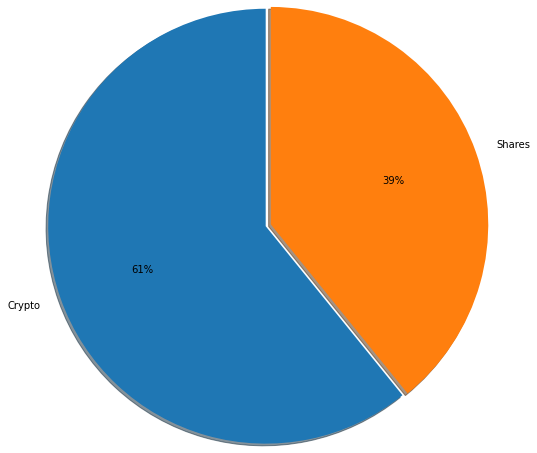

In [29]:
# Plot savings pie chart

labels = ['Crypto', 'Shares']   # Create labels for pie chart
crypto_percentage = 100 * df_savings.loc['crypto']['amount']/total_savings
shares_percentage = 100 * df_savings.loc['shares']['amount']/total_savings
sizes = [crypto_percentage, shares_percentage]
explode = [0, 0.05]  # detach the second element of the pie chart (shares) by this offset

fig1, ax1 = plt.subplots(figsize=(5,5))  # Setup figure and axes for ploting
ax1.axis('equal')  #ensure the pie chart is circular
#ax1.set_title("Portfolio Pie Chart")  #set piechart title

ax1.pie(sizes,       
        labels=labels,
        autopct='%1.0f%%',
        explode=explode,
       shadow=True,
       radius=2,
       startangle=90)


In [30]:
# Validate saving health
financial_goal = 3*monthly_income
if total_savings > financial_goal:
    print("Congratulations you have enough savings ")
elif total_savings == financial_goal:
    print('Congratulations reaching your financial goal')
else:
    print(f'You are ${financial_goal - total_savings} away from your target')

Congratulations you have enough savings 


## Retirement Planning

## Monte Carlo Simulation

In [31]:
# The effect of leap years on our calculations are negligble.  As such we elide this detail
five_years_in_days = 365 * 5
five_year_delta = datetime.timedelta(days=five_years_in_days)
today_datetime = datetime.datetime.today()
five_years_ago_datetime = today_datetime - five_year_delta
five_years_ago_iso = five_years_ago_datetime.isoformat()

In [32]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = five_years_ago_iso
end_date = today

In [33]:
# 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)

# Display sample data
#df_stock_data.head()

In [34]:
# 5 years' worth of historical data for SPY and AGG
five_years_hist_data = alpaca.get_barset(
    ['AGG','SPY'],
    '1D',
    start = start_date,
    end = today,
    limit = 1000
).df

In [35]:
#remove emplty cells in five years hist data
five_years_hist_data.dropna(inplace=True)
five_years_hist_data

AGG                                          \
                             open      high       low    close     volume   
time                                                                        
2017-09-28 00:00:00-04:00  109.58  109.7200  109.5100  109.680  1553324.0   
2017-09-29 00:00:00-04:00  109.74  109.7700  109.5400  109.640  2969204.0   
2017-10-02 00:00:00-04:00  109.43  109.4700  109.3300  109.425  3840216.0   
2017-10-03 00:00:00-04:00  109.46  109.5400  109.4000  109.520  2243369.0   
2017-10-04 00:00:00-04:00  109.56  109.5700  109.4100  109.500  2130907.0   
...                           ...       ...       ...      ...        ...   
2021-09-13 00:00:00-04:00  116.00  116.0750  115.9600  116.030  3289881.0   
2021-09-14 00:00:00-04:00  116.07  116.3800  116.0700  116.280  4036304.0   
2021-09-15 00:00:00-04:00  116.29  116.2929  116.0900  116.190  3348036.0   
2021-09-16 00:00:00-04:00  115.95  116.1100  115.9050  115.990  3673608.0   
2021-09-17 00:00:00-04:00  115.80  115.8750  115.7428  115.850  4662040.0   

                              SPY                                         
                             open    high       low   close       volume  
time                                                                      
2017-09-28 00:00:00-04:00  249.73  250.44  249.6300  250.34   25577234.0  
2017-09-29 00:00:00-04:00  250.34  251.32  250.1300  251.20   41410208.0  
2017-10-02 00:00:00-04:00  251.49  252.30  251.2926  252.29   37469184.0  
2017-10-03 00:00:00-04:00  252.46  252.89  252.2300  252.85   33875099.0  
2017-10-04 00:00:00-04:00  252.69  253.44  252.5600  253.16   30217246.0  
...                           ...     ...       ...     ...          ...  
2021-09-13 00:00:00-04:00  448.65  448.92  444.1100  446.56   75103627.0  
2021-09-14 00:00:00-04:00  448.12  448.34  443.2200  444.18   67959711.0  
2021-09-15 00:00:00-04:00  444.62  448.41  443.4400  447.87   69265024.0  
2021-09-16 00:00:00-04:00  447.32  448.36  444.0200  447.14   69354318.0  
2021-09-17 00:00:00-04:00  444.92  445.37  441.0200  441.41  100861596.0  

[999 rows x 10 columns]

In [45]:
#portfolio weights 40/60, AGG and SPY respectively
sim_weights = [0.4,0.6]
num_sim = 500
sim_days = 30*365 # we ignore leap years

montecarlo_sim = MCSimulation(five_years_hist_data, 
                             weights=sim_weights, 
                             num_simulation=num_sim,
                            num_trading_days=sim_days)

#print simulation input data
montecarlo_sim

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\bodem\BodeCode\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 10950 Trading Days.'}>

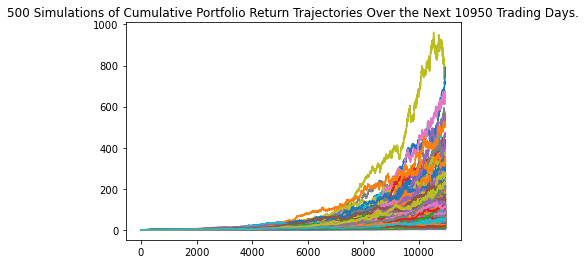

In [37]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# Plot simulation outcomes
montecarlo_sim.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

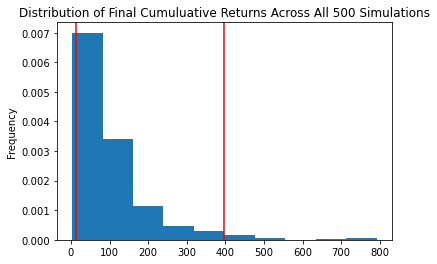

In [38]:
# Plot probability distribution and confidence intervals
montecarlo_sim.plot_distribution()

In [39]:
# Fetch summary statistics from the Monte Carlo simulation results
sim_summary_cumulative_return = montecarlo_sim.summarize_cumulative_return()
sim_summary_cumulative_return

count           500.000000
mean            105.497064
std             104.274003
min               3.224235
25%              39.567073
50%              74.525243
75%             129.177565
max             791.789425
95% CI Lower     13.215608
95% CI Upper    396.167163
Name: 10950, dtype: float64

In [40]:
type(sim_summary_cumulative_return)

pandas.core.series.Series

##  Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a $20,000 initial investment

In [41]:
ninety_five_ci_lower = sim_summary_cumulative_return['95% CI Lower']
ninety_five_ci_upper = sim_summary_cumulative_return['95% CI Upper']

In [42]:
# Set initial investment
base_investment_capital = 20000

#calculate expected returns on initial investment @ 95% lower and upper intervals
base_expected_return_at_95_lower_ci = ninety_five_ci_lower * base_investment_capital
base_expected_return_at_95_upper_ci = ninety_five_ci_upper * base_investment_capital

In [43]:
#calculate expected returns on  50% increase on initial investment @ 95% lower and upper intervals
capital_2 = base_investment_capital * 1.5
capital_2_expected_return_at_95_lower_ci = ninety_five_ci_lower * capital_2
capital_2_expected_return_at_95_upper_ci = ninety_five_ci_upper * capital_2

In [44]:
#outputs expected returns on initial investment @ 95% lower and upper intervals
print(f'The expected portfolio return at the 95% lower confidence level on ${base_investment_capital} = ${base_expected_return_at_95_lower_ci:.2f}')
print(f'The expected portfolio return at the 95% upper confidence level on ${base_investment_capital} = ${base_expected_return_at_95_upper_ci:.2f}')

#outputs expected returns on  50% increase on initial investment @ 95% lower and upper intervals
print(f'The expected portfolio return at the 95% lower confidence level on ${capital_2} = ${capital_2_expected_return_at_95_lower_ci:.2f}')
print(f'The expected portfolio return at the 95% upper confidence level on ${capital_2} = ${capital_2_expected_return_at_95_upper_ci:.2f}')

The expected portfolio return at the 95% lower confidence level on $20000 = $264312.16
The expected portfolio return at the 95% upper confidence level on $20000 = $7923343.26
The expected portfolio return at the 95% lower confidence level on $30000.0 = $396468.25
The expected portfolio return at the 95% upper confidence level on $30000.0 = $11885014.89
